# Comparison Analysis of 20180321_0814 Data
---

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import seaborn as sbn
import pandas as pd

Reading in the data from nice data files:

In [2]:
Nasa = pd.read_csv('Nasa_201803210814.csv')
Ours = pd.read_csv('Our_201803210814.csv')

In [3]:
Nasa.head()

,Mag,Time
0,0.033729,0.023768
1,-0.371024,0.058268
2,-1.005137,0.121986
3,-1.301956,0.155625
4,-1.531316,0.183957


In [4]:
Ours.head()

,Mag,Time
0,-1.539167,0.000000
1,-1.824041,0.033333
2,-2.121834,0.066667
3,-2.095916,0.100000
4,-2.376626,0.133333


Shifting the time to get things to line up. This was done via plotting and trying several different shifts to get it close.

In [5]:
Ours.Time += .01

Setting the index to use time. Probably should have just specified this when I loaded the data.

In [6]:
Nasa = Nasa.set_index('Time')
Ours = Ours.set_index('Time')

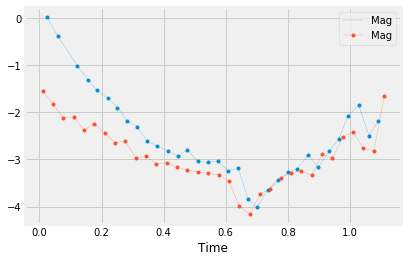

In [7]:
ax = Nasa.plot(style='.-', lw=.2)
Ours.plot(ax=ax, style='.-', lw=.2);

Joining the two data sets. I'm using the `how='outer'` option to merge ALL the time stamps from each data set. I then call interpolate to fill in all the NaN values with a linear guess as to what the inbetween points might have been. I think this is a decent way of comparing the two datasets point by point.

In [8]:
Joined = Nasa.join(Ours, rsuffix='O',how='outer').interpolate()
Joined.head()

,Mag,MagO
Time,,
0.010000,NaN,-1.539167
0.023768,0.033729,-1.681604
0.043333,-0.168647,-1.824041
0.058268,-0.371024,-1.972937
0.076667,-0.582395,-2.121834


We can see that the number of data points has clearly increased, but the overall shape still looks unchanged so I think everything is fine.

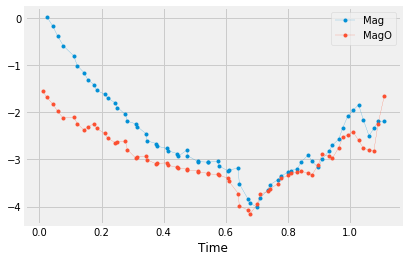

In [9]:
Joined.plot(style='.-', lw=.2);

Adding a new column with the magnitude differences

In [10]:
Joined['dM'] = Joined.Mag - Joined.MagO

In [11]:
Joined.head()

,Mag,MagO,dM
Time,,,
0.010000,NaN,-1.539167,NaN
0.023768,0.033729,-1.681604,1.715333
0.043333,-0.168647,-1.824041,1.655394
0.058268,-0.371024,-1.972937,1.601914
0.076667,-0.582395,-2.121834,1.539439


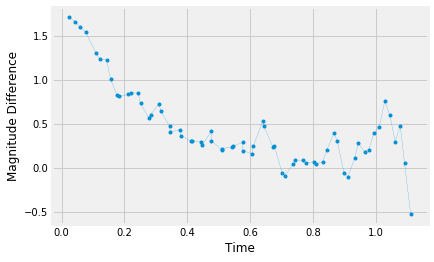

In [12]:
Joined.dM.plot(style='.-',lw=.2)
plt.ylabel('Magnitude Difference');

Making a violin plot of the results. Violin plots don't seem to like NaN's, so I dropped them and then also subtracted off the mean.

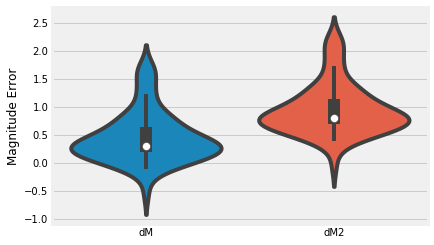

In [39]:
test = pd.DataFrame(Joined.dM)
test['dM2'] = test.dM+0.5
sbn.violinplot(data=test)
plt.ylabel('Magnitude Error');

For comparison, a box plot. But I think the violin plots look way nicer __and__ have more information about the distribution.

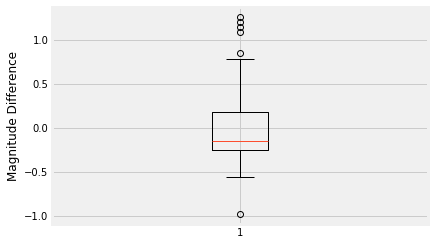

In [14]:
plt.boxplot(Joined.dM.dropna()-Joined.dM.mean())
plt.ylabel('Magnitude Difference');

Wrote out the total dataset to file for late importing or usage:

In [15]:
Joined.dropna().to_csv('Cleaned_201803210814.csv')